In [71]:
import pandas as pd
import matplotlib as mlt

weather = pd.read_csv("weather.csv", index_col="DATE") #data usata come indice del df


In [72]:
#pulitura df, calcola missing values %
null_pct = weather.apply(pd.isnull).sum() / weather.shape[0]


In [73]:
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.303807
SNWD       0.913967
TAVG       0.000000
TMAX       0.330710
TMIN       0.470898
dtype: float64

In [74]:
# pulitura: rimuovi colonne con molti NaN
valid_cols = weather.columns[null_pct < .35]

In [75]:
valid_cols

Index(['STATION', 'NAME', 'PRCP', 'TAVG', 'TMAX'], dtype='object')

In [76]:
weather = weather[valid_cols].copy()
weather.columns = weather.columns.str.lower()

In [77]:
weather

,station,name,prcp,tavg,tmax
DATE,,,,,
1973-05-06,ITM00016061,"TORINO BRIC CROCE, IT",NaN,14.7,NaN
1973-09-17,ITM00016061,"TORINO BRIC CROCE, IT",NaN,17.7,NaN
1973-12-13,ITM00016061,"TORINO BRIC CROCE, IT",NaN,-3.4,-2.0
1973-12-17,ITM00016061,"TORINO BRIC CROCE, IT",NaN,6.0,NaN
1974-03-27,ITM00016061,"TORINO BRIC CROCE, IT",NaN,7.5,NaN
...,...,...,...,...,...
2024-08-28,ITM00016061,"TORINO BRIC CROCE, IT",NaN,23.6,27.1
2024-08-29,ITM00016061,"TORINO BRIC CROCE, IT",NaN,24.5,28.7
2024-08-30,ITM00016061,"TORINO BRIC CROCE, IT",NaN,25.4,NaN


In [78]:
weather['prcp'] = weather['prcp'].fillna(0.0)

In [79]:
weather

,station,name,prcp,tavg,tmax
DATE,,,,,
1973-05-06,ITM00016061,"TORINO BRIC CROCE, IT",0.0,14.7,NaN
1973-09-17,ITM00016061,"TORINO BRIC CROCE, IT",0.0,17.7,NaN
1973-12-13,ITM00016061,"TORINO BRIC CROCE, IT",0.0,-3.4,-2.0
1973-12-17,ITM00016061,"TORINO BRIC CROCE, IT",0.0,6.0,NaN
1974-03-27,ITM00016061,"TORINO BRIC CROCE, IT",0.0,7.5,NaN
...,...,...,...,...,...
2024-08-28,ITM00016061,"TORINO BRIC CROCE, IT",0.0,23.6,27.1
2024-08-29,ITM00016061,"TORINO BRIC CROCE, IT",0.0,24.5,28.7
2024-08-30,ITM00016061,"TORINO BRIC CROCE, IT",0.0,25.4,NaN


In [80]:
weather = weather.ffill().fillna(15.0)

In [81]:
weather

,station,name,prcp,tavg,tmax
DATE,,,,,
1973-05-06,ITM00016061,"TORINO BRIC CROCE, IT",0.0,14.7,15.0
1973-09-17,ITM00016061,"TORINO BRIC CROCE, IT",0.0,17.7,15.0
1973-12-13,ITM00016061,"TORINO BRIC CROCE, IT",0.0,-3.4,-2.0
1973-12-17,ITM00016061,"TORINO BRIC CROCE, IT",0.0,6.0,-2.0
1974-03-27,ITM00016061,"TORINO BRIC CROCE, IT",0.0,7.5,-2.0
...,...,...,...,...,...
2024-08-28,ITM00016061,"TORINO BRIC CROCE, IT",0.0,23.6,27.1
2024-08-29,ITM00016061,"TORINO BRIC CROCE, IT",0.0,24.5,28.7
2024-08-30,ITM00016061,"TORINO BRIC CROCE, IT",0.0,25.4,28.7


In [82]:
null_pct = weather.apply(pd.isnull).sum() / weather.shape[0]
null_pct

station    0.0
name       0.0
prcp       0.0
tavg       0.0
tmax       0.0
dtype: float64

In [83]:
#data preparation: verifico i data types
#station: object (è l'id della stazione meteo)
#name = object (nome stazion)
#queste due è giusto siano object
#tutte le altre sono giuste: sono float64
weather.dtypes

weather.index

Index(['1973-05-06', '1973-09-17', '1973-12-13', '1973-12-17', '1974-03-27',
       '1974-06-20', '1975-01-30', '1975-01-31', '1975-02-01', '1975-02-02',
       ...
       '2024-08-23', '2024-08-24', '2024-08-25', '2024-08-26', '2024-08-27',
       '2024-08-28', '2024-08-29', '2024-08-30', '2024-08-31', '2024-09-01'],
      dtype='object', name='DATE', length=17284)

In [84]:
#converti index da object a datetime per comodità
weather.index = pd.to_datetime(weather.index)
weather.index
weather.index.year.value_counts().sort_index()

DATE
1973      4
1974      2
1975    329
1976    343
1977    362
1978    357
1979    349
1980    361
1981    364
1982    360
1983    364
1984    364
1985    363
1986    364
1987    362
1988    363
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    364
2000    366
2001    364
2002    364
2003    364
2004    365
2006    365
2007    365
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    364
2019    365
2020    357
2021    362
2022    365
2023    365
2024    239
Name: count, dtype: int64

In [85]:
#elimina gaps: inizia dal 1980
weather = weather[weather.index.year >= 1980]
weather.index.year.value_counts().sort_index()

DATE
1980    361
1981    364
1982    360
1983    364
1984    364
1985    363
1986    364
1987    362
1988    363
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    364
2000    366
2001    364
2002    364
2003    364
2004    365
2006    365
2007    365
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    364
2019    365
2020    357
2021    362
2022    365
2023    365
2024    239
Name: count, dtype: int64

<AxesSubplot:xlabel='DATE'>

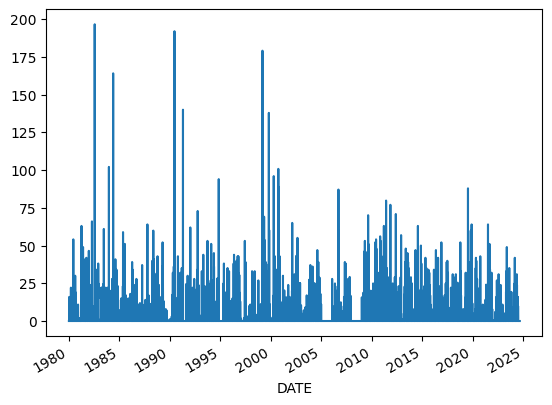

In [88]:
weather['prcp'].plot()

In [91]:
#I DATI POSSONO ANDARE BENE

#COLONNE TARGET
weather["target"] = weather.shift(-1)["tavg"] #la temp target corrisponde alla temp del giorno dopo
#l'algoritmo deve cioè alla fine prevedere la temp avg di domani
#ovviamente il valore target dell'ultimo giorno del db è Nan
#per risolvere ciò faccio di nuovo un ffil()
weather = weather.ffill()
weather

<ipython-input-91-1d31f364fe78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather["target"] = weather.shift(-1)["tavg"] #la temp target corrisponde alla temp del giorno dopo


,station,name,prcp,tavg,tmax,target
DATE,,,,,,
1980-01-01,ITM00016061,"TORINO BRIC CROCE, IT",0.0,1.3,4.0,0.3
1980-01-02,ITM00016061,"TORINO BRIC CROCE, IT",0.0,0.3,4.0,-0.7
1980-01-03,ITM00016061,"TORINO BRIC CROCE, IT",0.0,-0.7,3.0,-0.8
1980-01-04,ITM00016061,"TORINO BRIC CROCE, IT",0.0,-0.8,2.0,-2.2
1980-01-05,ITM00016061,"TORINO BRIC CROCE, IT",0.0,-2.2,-2.0,0.8
...,...,...,...,...,...,...
2024-08-28,ITM00016061,"TORINO BRIC CROCE, IT",0.0,23.6,27.1,24.5
2024-08-29,ITM00016061,"TORINO BRIC CROCE, IT",0.0,24.5,28.7,25.4
2024-08-30,ITM00016061,"TORINO BRIC CROCE, IT",0.0,25.4,28.7,25.1


In [101]:
#ALGORTIMO ML
#MODELLO DI REGRESSIONE RIDGE
from sklearn.linear_model import Ridge

In [100]:
weather_corrs = weather[['prcp', 'tavg', 'tmax', 'target']]
#tmax è tavg ovviamente sono molto correlate tra loro
#prcp è quella meno correlata con le altre!
#è giusto che target sia abbastanza correlata con tmax e tavg essendo una temperatura anch'essa!
weather_corrs.corr()

,prcp,tavg,tmax,target
prcp,1.000000,-0.044681,-0.048661,-0.013688
tavg,-0.044681,1.000000,0.794314,0.958561
tmax,-0.048661,0.794314,1.000000,0.759994
target,-0.013688,0.958561,0.759994,1.000000


In [102]:
#RIDGE è meglio di Linear Regression in questo caso per gestire meglio la colinearità
'''
La Ridge Regression è una tecnica di apprendimento supervisionato che aggiunge un termine di 
regolarizzazione chiamato “ridge penalty” alla funzione obiettivo. 
Questo aiuta a prevenire l'eccessiva sensibilità ai dati di addestramento, riducendo l'overfitting
'''

rr = Ridge(alpha=.1) #alpha fa quello spiegato sopra

In [104]:
#PREDICTORS: prcp, tavg, tmax
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]
predictors

Index(['prcp', 'tavg', 'tmax'], dtype='object')

In [115]:
# i dati rappresentano una time series
# pertanto per tenere conto della time series bisogna ricorrere al backtesting
def backtest(weather, model, predictors, start=3650,step=90):
    #weather è il df pandas
    #model è il modello di Ridge
    #predictors quelli definiti prima
    #start = voglio 10 anni di dati (approx) -> PRIMI 10 ANNI = PRIMO SET DI PREDICTIONS
    #step = ogni 90 giorni (3 mesi circa) si crea un set di predictions
    all_preds = [] #lista di tutte le preds (di 90 days in 90)
    end = weather.shape[0] # prendi tutto il df

    #PREDICTION DI 90 GIORNI
    for i in range(start, end, step):
        #avanza di 90 giorni in 90 giorni
        #ogni iterazione crea un training set
        train = weather.iloc[:i,:] #tutte le righe fino a i
        test = weather.iloc[i:(i+step),:i] #prendi i 90 giorni DOPO quelli del train set, su cui fare predictions

        #fitta modello ad ogni iterazione col train set
        model.fit(train[predictors], train["target"])

        #fai la predizione passandogli il test set
        preds = model.predict(test[predictors]) 

        #converti in Series di pandas
        preds = pd.Series(preds, index=test.index)

        #concatena i dati di test veri (test["target"]) con le preds appena fatte
        #due colonne separate nello stesso df: una coi dati veri una con le preds
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "predicted"]
        combined["diff"] = (combined["actual"] - combined["predicted"]).abs()
        all_preds.append(combined)

    #DF COMPLETO DI TUTTE LE PREDICTIONS (axis = 0, tutte separate)
    return pd.concat(all_preds)
        

In [116]:
#PROVA DEL MODELLO

predictions = backtest(weather, rr, predictors)

In [118]:
predictions

,actual,predicted,diff
DATE,,,
1990-01-21,7.8,7.580421,0.219579
1990-01-22,7.2,7.906167,0.706167
1990-01-23,4.2,7.341639,3.141639
1990-01-24,3.7,4.523967,0.823967
1990-01-25,4.2,4.034892,0.165108
...,...,...,...
2024-08-28,24.5,23.072773,1.427227
2024-08-29,25.4,23.934585,1.465415
2024-08-30,25.1,24.800417,0.299583


In [122]:
#TEST DI QUANTO SIA BUONO IL MODELLO
#MEAN ABSOLUTE ERROR
#DI FATTO PRENDI LA DIFF E TROVA LA MEDIA E CONFRONTA 
from sklearn.metrics import mean_absolute_error

MAR = mean_absolute_error(predictions["actual"], predictions["predicted"])
avgDiff = predictions["diff"].mean()

print("MAR:\n", MAR)
print("Avg diff:\n", avgDiff)

#NELLA MEDIA: 1.56 GRADI DI ERRORE RISPETTO ALL'ACTUAL

MAR:
 1.564855268266514
Avg diff:
 1.564855268266514
